# Lab 2 -- Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

## 1. The data

In [2]:
# Load the dataset
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt('data1.txt', delimiter=',')
 
X = data[:, 0:2]
y = data[:, 2]

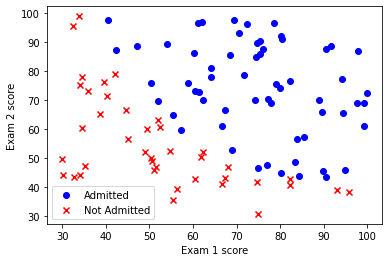

In [3]:
# Plot data 
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

In [61]:
#Add intercept term to X
#We want theta to be the weight of each feature
#When we compute scaler of x with theta, we want the intercept term being Theta
#We are trying to match a model that has 2 features bc n=2 , so we add a third column with only ones so that the dot product will only be theta0
X_new = np.ones((X.shape[0], 3))
X_new[:, 1:] = X
X = X_new

## 2. What is logistic regression 

Logistic regression may be explained from a probabilistic perspective. 

Let us denote $x_{1:m}, y_{1:m} \sim X, Y$ i.i.d observations of $X \in \mathbb{R}^p, Y \in \{0,1\}$.

### The model

Let us consider the following regression model to explain the data
\begin{equation*}
    P_{Y|X=x} = \mathrm{Ber}(p = \sigma(x^\top \theta))
\end{equation*}

### Maximizing the likelihood
Under this model, the probability of observing $(x_i, y_i)$ is
\begin{align*}
    p_{Y|X=x_i}(y_i) &= p^{y_i} (1-p)^{1-y_i} \\
    &= \sigma(x_i^\top\theta)^{y_i} (1-\sigma(x_i^\top\theta))^{1-y_i}
\end{align*}

The optimal value of $\theta$ is chosen to maximize the likelihood of observations that is
\begin{align*}
    \theta^* &= \underset{\theta}{\text{arg max}} \prod_{i=1}^m p_{Y|X=x_i}(y_i) \\
    &= \underset{\theta}{\text{arg max}} \sum_{i=1}^m \log p_{Y|X=x_i}(y_i) \\
    &= \underset{\theta}{\text{arg max}} \sum_{i=1}^m y_i \log \sigma(\theta^\top x_i) + (1-y_i) \log (1-\sigma(\theta^\top x_i)) \\
    &= \underset{\theta}{\text{arg min}} -\frac{1}{m} \sum_{i=1}^m y_i \log \sigma(\theta^\top x_i) + (1-y_i) \log (1-\sigma(\theta^\top x_i)) \\
    &= \underset{\theta}{\text{arg min}} \quad J(\theta)
\end{align*}

## 3. Implementation

### 3.1 The sigmoid

In [62]:
# Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Logit function
def logit(z):
    return np.log(z/(1-z))

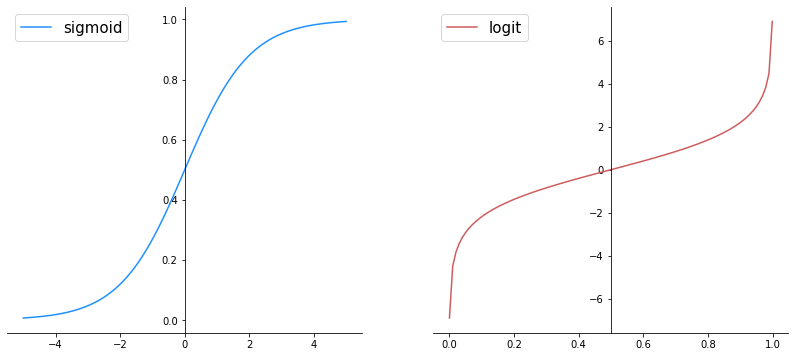

In [63]:
# Plot sigmoid and logit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
Xplot = np.linspace(-5, 5, 100)
Yplot = sigmoid(Xplot)
ax[0].plot(Xplot, Yplot, color='dodgerblue', label='sigmoid')
Xplot = np.linspace(0.001, 0.999, 100)
Yplot = logit(Xplot)
ax[1].plot(Xplot, Yplot, color='indianred', label='logit')
for i in range(2):
    ax[i].legend(loc='best', fontsize=15)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_position('center')
plt.show(fig)

#We see that sigmoid tends to 0 when x -inf and 1 when x +inf -> this is a probability bc digits between 0 and 1
#Logit function: is much more of a regression term bc -inf and +inf 
#Confirms we should work with the sigmoid function here 

In [64]:
#checks if sigmoid has the correct values in it
def test_sigmoid():
    # scalar test
    z, s = 0.5, 0.622459
    if np.abs(sigmoid(z)-s) < 1e-5:
        print("scalar test passed")
    else:
        raise ValueError("scalar test not passed!")
        
    # vector test
    z, s = np.array([1,-1,0.5]), np.array([0.73105858, 0.26894142, 0.62245933])
    if np.sum(np.abs(sigmoid(z)-s)) < 1e-5:
        print("vector test passed")
    else:
        raise ValueError("vector test not passed!")
        
test_sigmoid()

scalar test passed
vector test passed


### 3.2 The cost function $J(\theta)$

The cross-entropy function with sigmoid - need to write this expression in matrix form 

The cost function is the following

\begin{equation}
    J_\theta = -\frac{1}{m} \sum_{i=1}^m y_i \log(\sigma(x_i^T\theta)) + (1-y_i) \log(1 -\sigma(x_i^T\theta))
\end{equation}

In a matrix notation
\begin{equation}
    \text{PLEASE FIND THE MATRIX FORM}
\end{equation}

In [65]:
# Dependence on X,y is implicit
# X, y are defined globally
def computeCost(theta):
    J1 = y.T @ np.log(sigmoid(X @ theta))
    J2 = (1-y).T@np.log(1-sigmoid(X @ theta))
    m=X.shape[0]
    return ((-1/m)*(J1+J2))

In [67]:
def test_computeCost():
    # test 1
    theta, cost = [0, 0, 0], 0.6931471
    if np.abs(computeCost(theta)-cost) < 1e-5:
        print("test 1 passed")
    else:
        raise ValueError("test 1 not passed!")
        
    # test 2
    theta, cost = [-0.01, 0.05, 0], 1.092916
    if np.abs(computeCost(theta)-cost) < 1e-5:
        print("test 2 passed")
    else:
        raise ValueError("test 2 not passed!")
        
test_computeCost()

test 1 passed


ValueError: test 2 not passed!

### 3.3 The gradient function

The gradient of the cost function is given by
\begin{equation}
    \text{PLEASE FIND THE GRADIENT}
\end{equation}

In [68]:
# Dependence on X,y is implicit
# X, y are defined globally
def computeGrad(theta):
    # Computes the gradient of the cost with respect to
    # the parameters.
    #m is number of observations in sample
    m = X.shape[0]

    return (-1/m) * (X.T @ (y-sigmoid(X @ theta)))

In [69]:
def test_computeGrad():
    # test 1
    theta, grad = [0, 0, 0], np.array([ -0.1, -12.00921659, -11.26284221])
    if np.sum(np.abs(computeGrad(theta)-grad)) < 1e-5:
        print("test 1 passed")
    else:
        raise ValueError("test 1 not passed!")
        
    # test 2
    theta, grad = [0.02, 0, -0.04], np.array([-0.51775522, -39.39901278, -39.85199474])
    if np.sum(np.abs(computeGrad(theta)-grad)) < 1e-5:
        print("test 2 passed")
    else:
        raise ValueError("test 2 not passed!")
        
test_computeGrad()

ValueError: test 1 not passed!

### 3.4 Solve the optimization problem (i.e., fit the model to the data)

In [37]:
#Initialization of theta, theta should be of shape (3,1)
theta = np.zeros((3,1))

In [38]:
# Run minimize() to obtain the optimal theta
Result = op.minimize(fun=computeCost, x0=theta, 
                     method = 'TNC', jac=computeGrad);

In [39]:
Result

     fun: 0.6730116670092565
     jac: array([-2.04454231e-13, -2.04454231e-13, -2.04454231e-13])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 7
     nit: 3
  status: 1
 success: True
       x: array([0.13515504, 0.13515504, 0.13515504])

The result interpretation: 'Local minimum reached'
x: array is the thetas that minimize our loss functions

Sumup: had a data and computed loss function to maximize likelihood of what our data should look like in a supervised manner + we implement a compute gradient function to have the gradient of loss function and find minimum on gradient descend 
With this minimum, we take the theatas (=the weights) that are the more accurate to describe the data set we have
So now, we want to visualize the fit and assess whether the boundary we have drawn is accurate (ideally we should see whether our prob is greater or less than 0.5 )

### 3.5 Visualize the fit

The decision boundary is given by

\begin{equation}
\sigma(\theta^T x) = 0.5 \iff \theta^T x = 0
\end{equation}

i.e
\begin{equation}
  x_2 = -\frac{\theta_1}{\theta_2}x_1 - \frac{\theta_0}{\theta_2}
\end{equation}

<ipython-input-40-4d06282e586a>:3: RuntimeWarning: divide by zero encountered in true_divide
  plot_y = (- 1.0 / theta[2]) * (theta[1] * plot_x + theta[0])
<ipython-input-40-4d06282e586a>:3: RuntimeWarning: invalid value encountered in multiply
  plot_y = (- 1.0 / theta[2]) * (theta[1] * plot_x + theta[0])


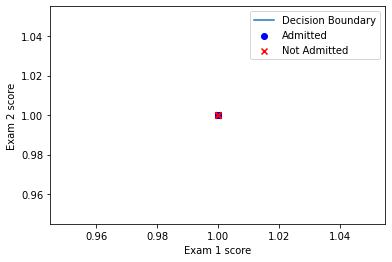

In [40]:
# Plot the decision boundary
plot_x = np.array([min(X[:, 1]), max(X[:, 1])])
plot_y = (- 1.0 / theta[2]) * (theta[1] * plot_x + theta[0])
plt.plot(plot_x, plot_y)
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Decision Boundary', 'Admitted', 'Not Admitted'])
plt.show()

Analysis of graph (mine is incorrect but the correct one)
Could maybe have an exam 3 feature
here we don't take into account over fitting
Should never evaluate the model ON the training set (but here we will do so for sake of simplicity)

### 3.6 Evaluate the model

In [43]:
def predict(theta, X):
    # Predict whether the label is 0 or 1 using learned logistic 
    # regression parameters theta. The threshold is set at 0.5
    
    pred= np.zeros(X.shape[0])
    prob= sigmoid(X@theta)
    pred[np.where(prob>=0.5)]=1
    return pred

In [44]:
def test_predict():
    # test 1
    X_test, y_pred = np.array([[1,40, 20], [1,40,80], [1,80,80]]), np.array([0,0,1])
    if np.sum(np.abs(y_pred - predict(Result.x, X_test))) == 0:
        print("test 1 passed")
    else:
        raise ValueError("test 1 not passed!")

    # test 2
    X_test, y_pred = np.array([[1,70, 50], [1,70,40]]), np.array([0,0])
    if np.sum(np.abs(y_pred - predict(Result.x, X_test))) == 0:
        print("test 2 passed")
    else:
        raise ValueError("test 2 not passed!")
        
test_predict()

ValueError: test 1 not passed!

In [45]:
# Compute accuracy on the training set

p = predict(Result.x, X)
counter = 0
for i in range(y.size):
    if p[i] == y[i]:
        counter += 1
print('Train Accuracy: {:.2f}'.format(counter / float(y.size) * 100.0))

Train Accuracy: 60.00


Predict using the best theta and the whole training data set 
NOT THE RIGHT WAY OF EVALUATING MODEL: we fitted on data set and we train and evaluate on the SAME data set, so obviously we get a high accuracy (89%)